FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/valores_nulos_variables_especificas.png'

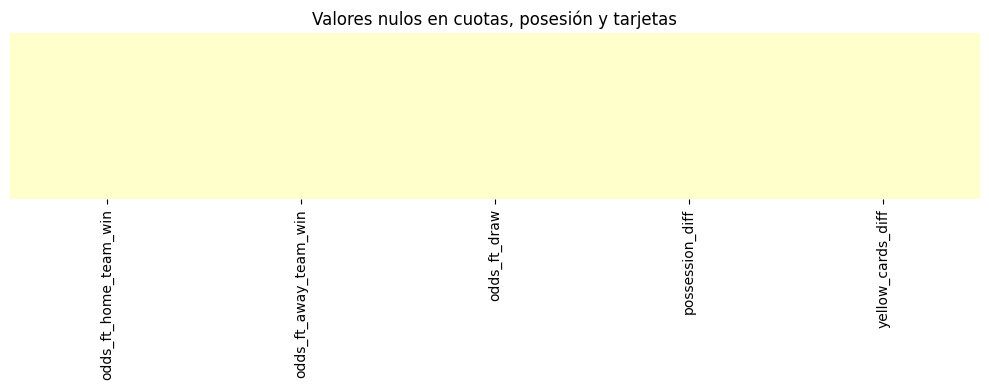

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/dataset_refinado_limpio_TFG.xlsx")

cols_nulos = [
    "odds_ft_home_team_win", "odds_ft_away_team_win", "odds_ft_draw",
    "possession_diff", "yellow_cards_diff"
]

plt.figure(figsize=(10, 4))
sns.heatmap(df[cols_nulos].isnull(), cbar=False, cmap="YlOrRd", yticklabels=False)
plt.title("Valores nulos en cuotas, posesión y tarjetas")
plt.tight_layout()
plt.savefig("/mnt/data/valores_nulos_variables_especificas.png")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/boxplots_outliers_variables.png'

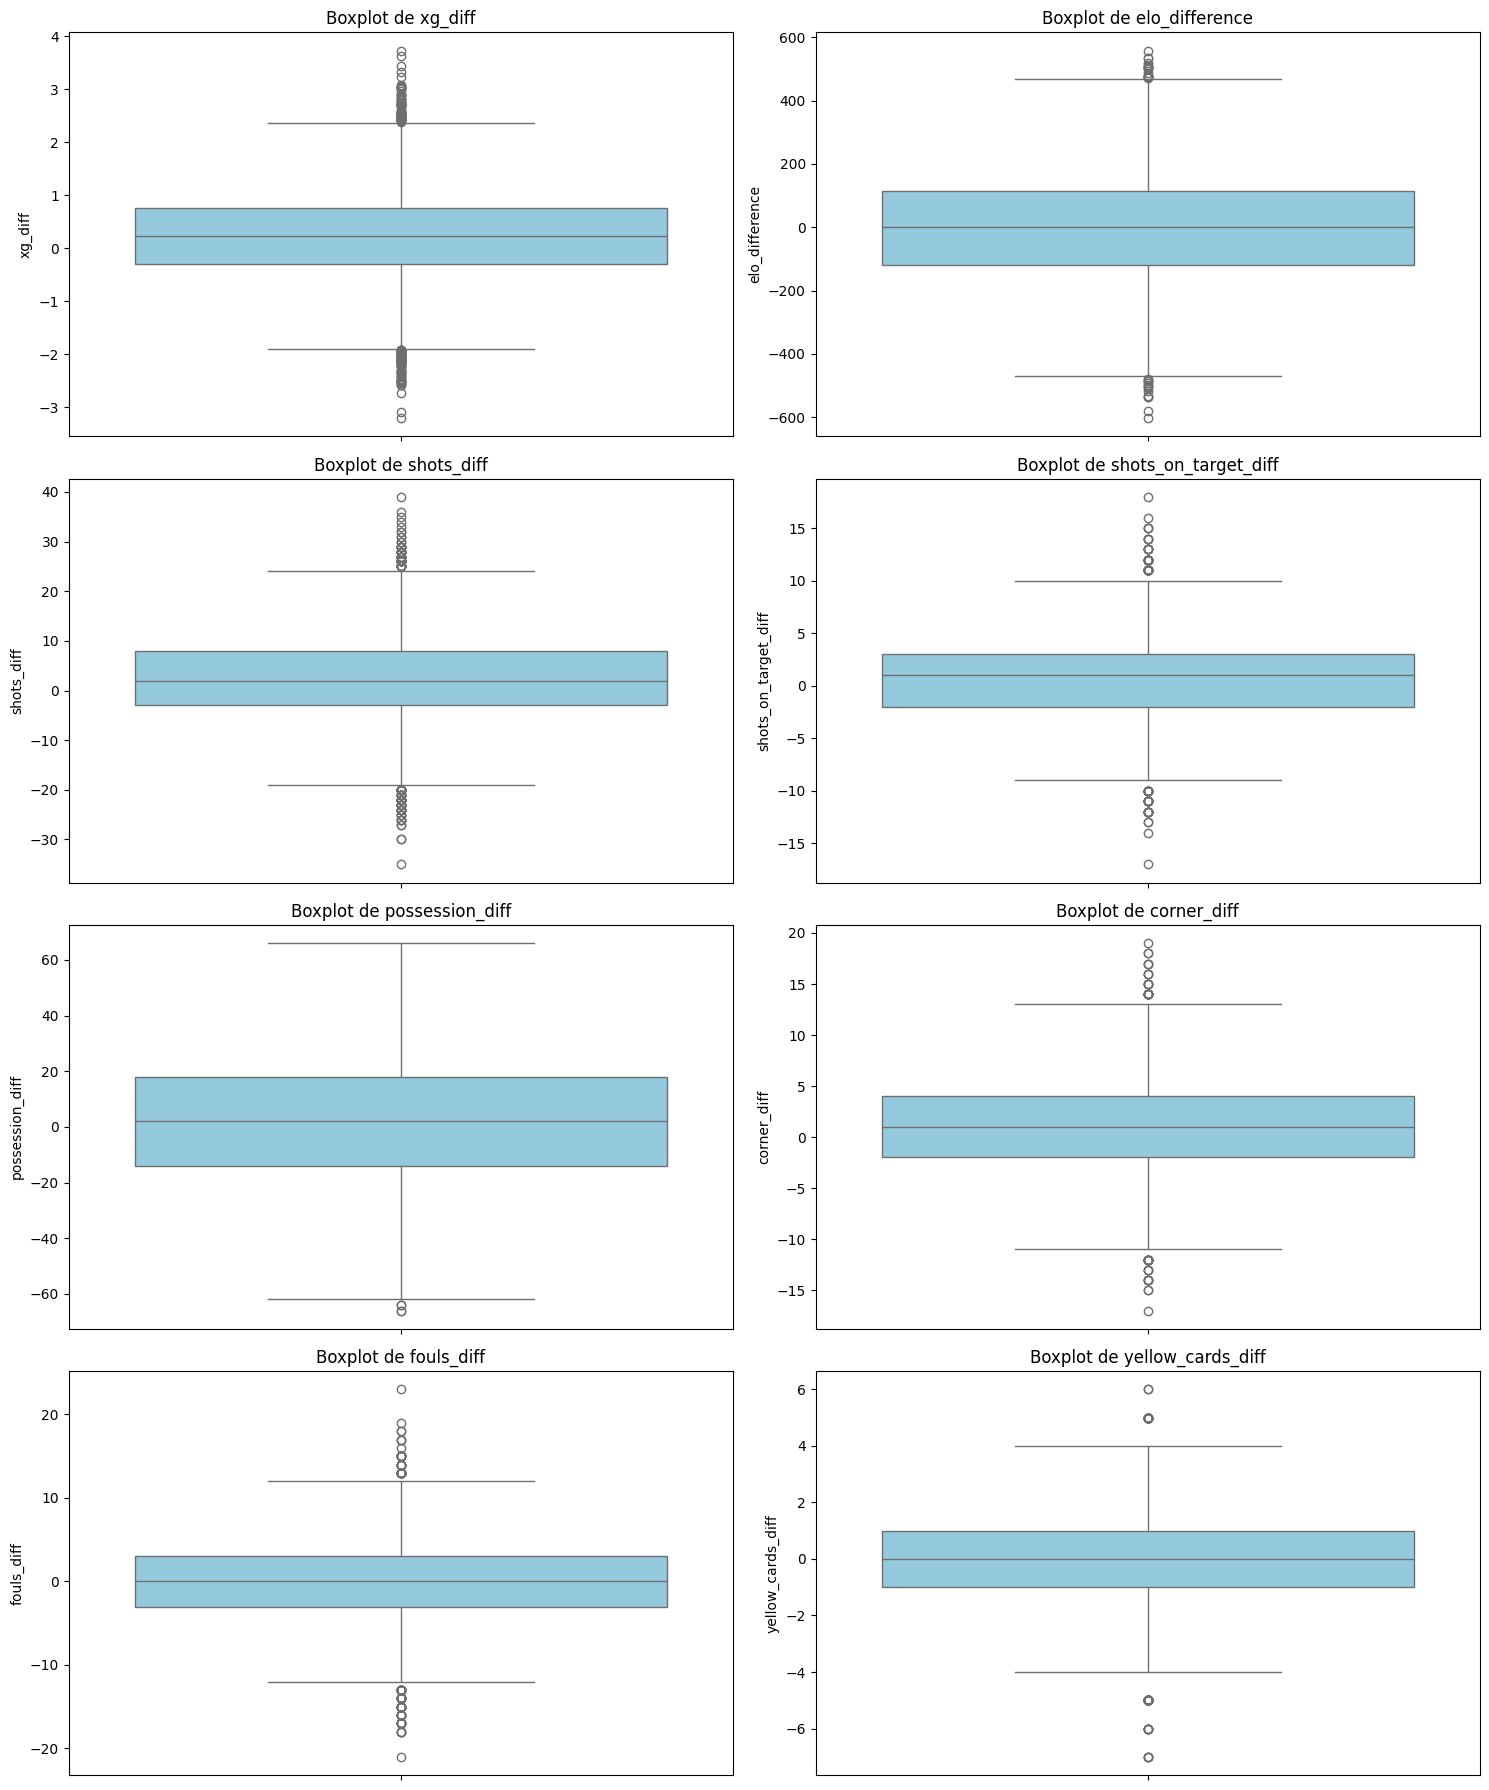

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/dataset_refinado_limpio_TFG.xlsx")

variables_outliers = [
    "xg_diff", "elo_difference", "shots_diff", "shots_on_target_diff",
    "possession_diff", "corner_diff", "fouls_diff", "yellow_cards_diff"
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))
axes = axes.flatten()

for i, var in enumerate(variables_outliers):
    sns.boxplot(data=df, y=var, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.savefig("/mnt/data/boxplots_outliers_variables.png")
plt.show()


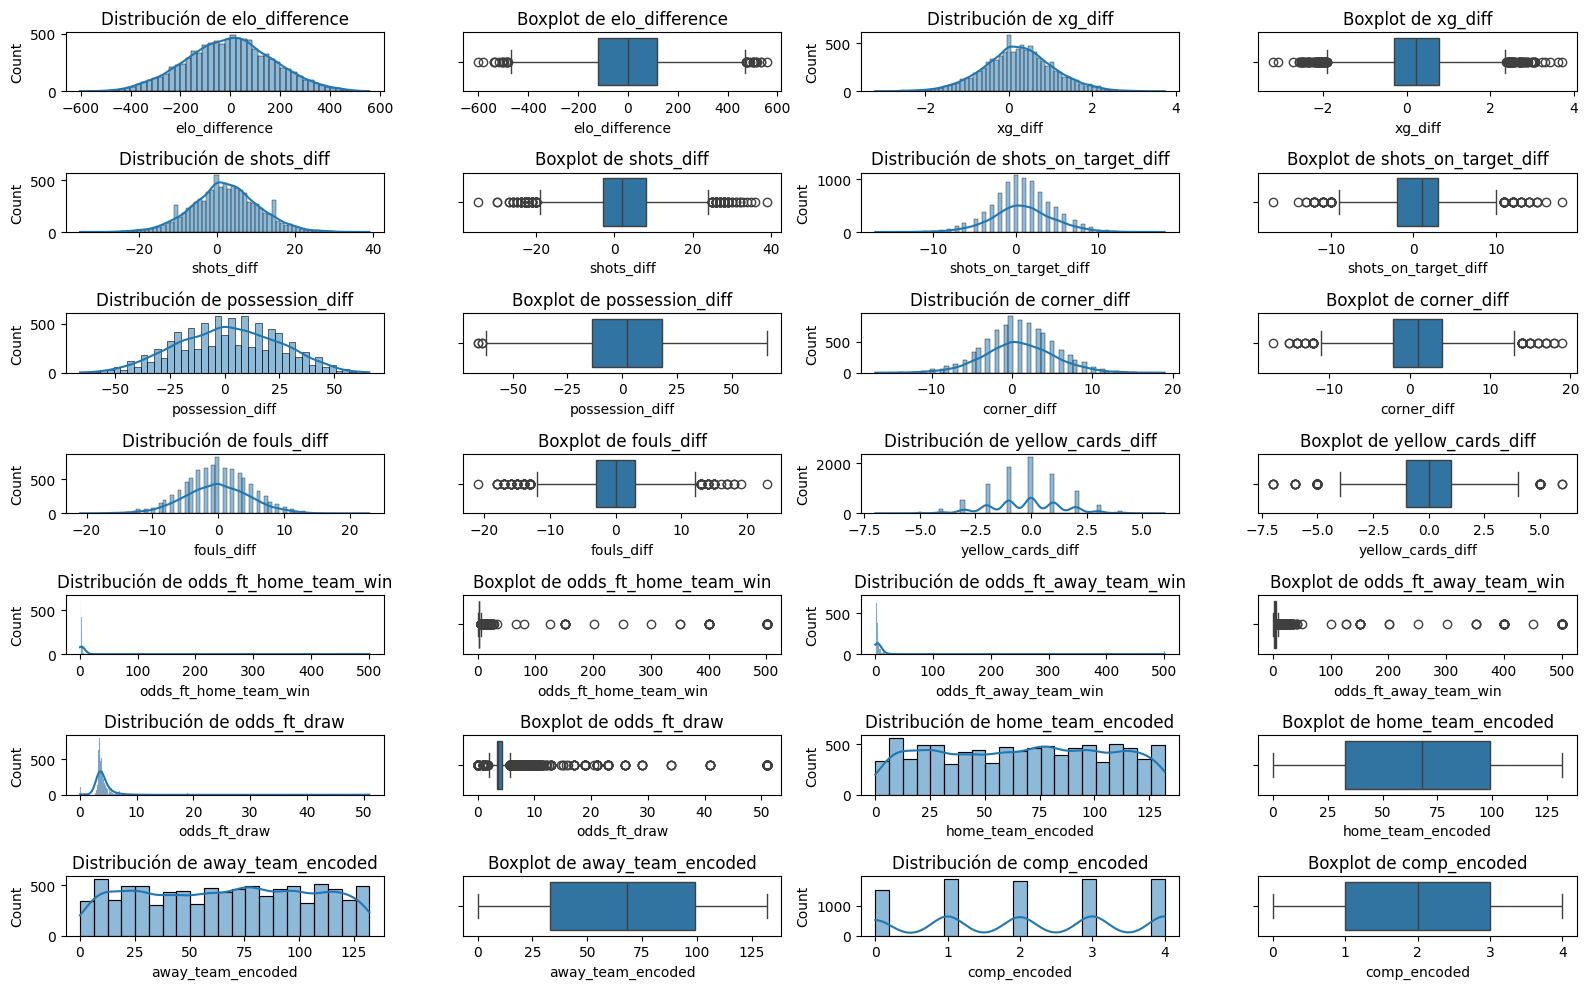

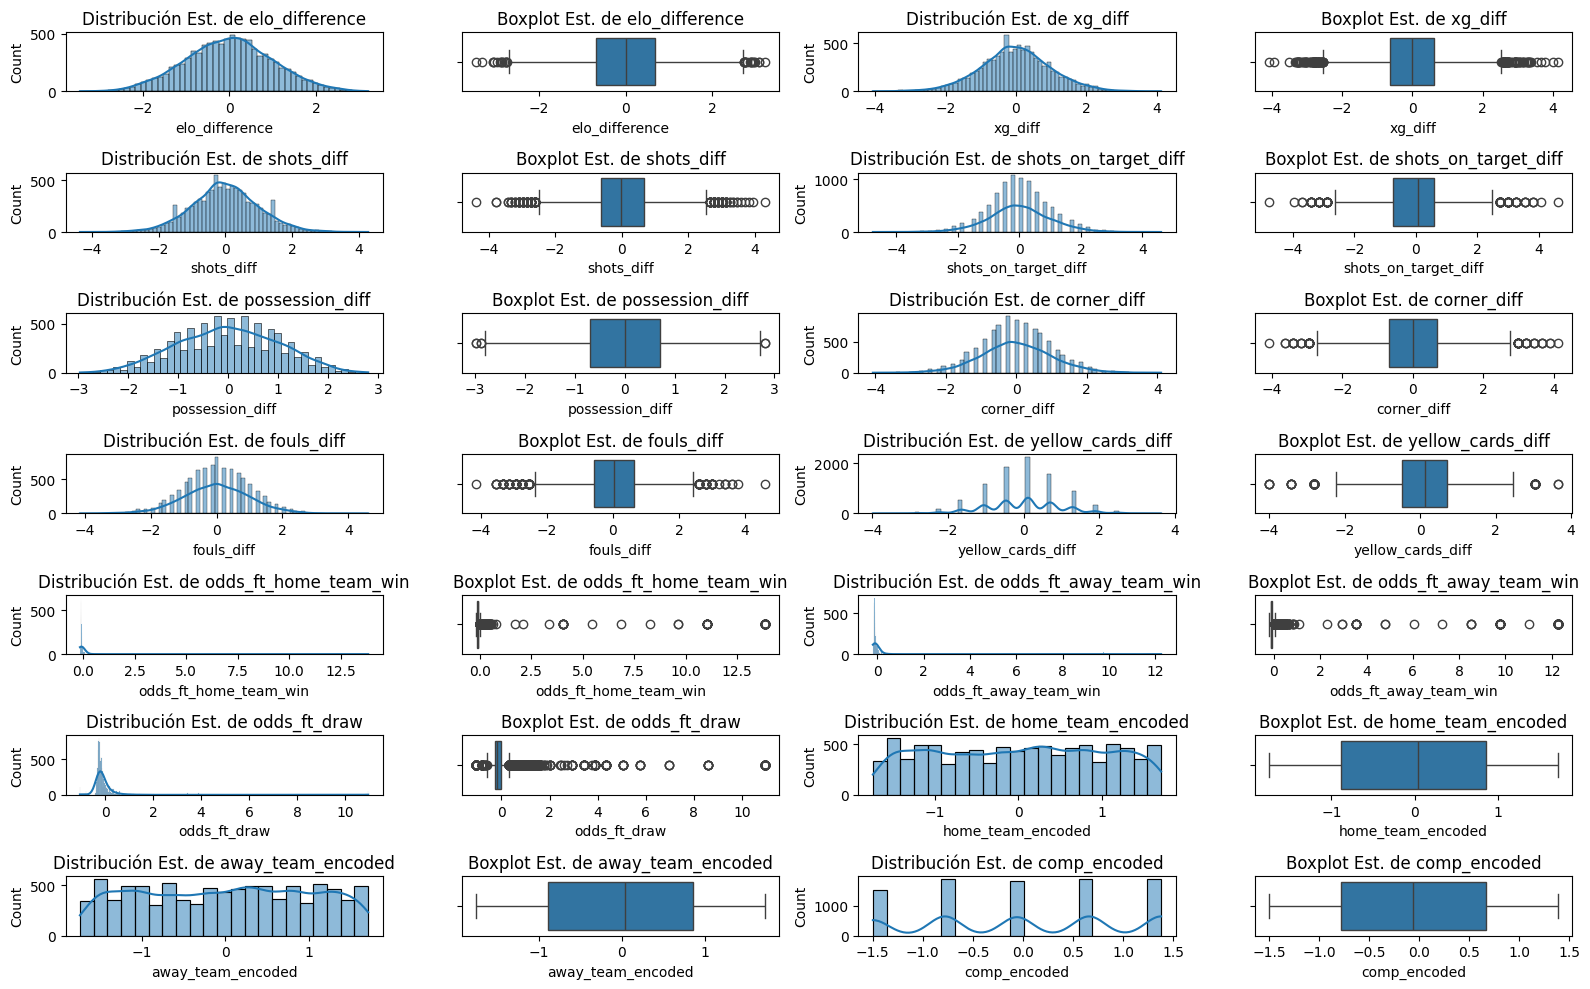

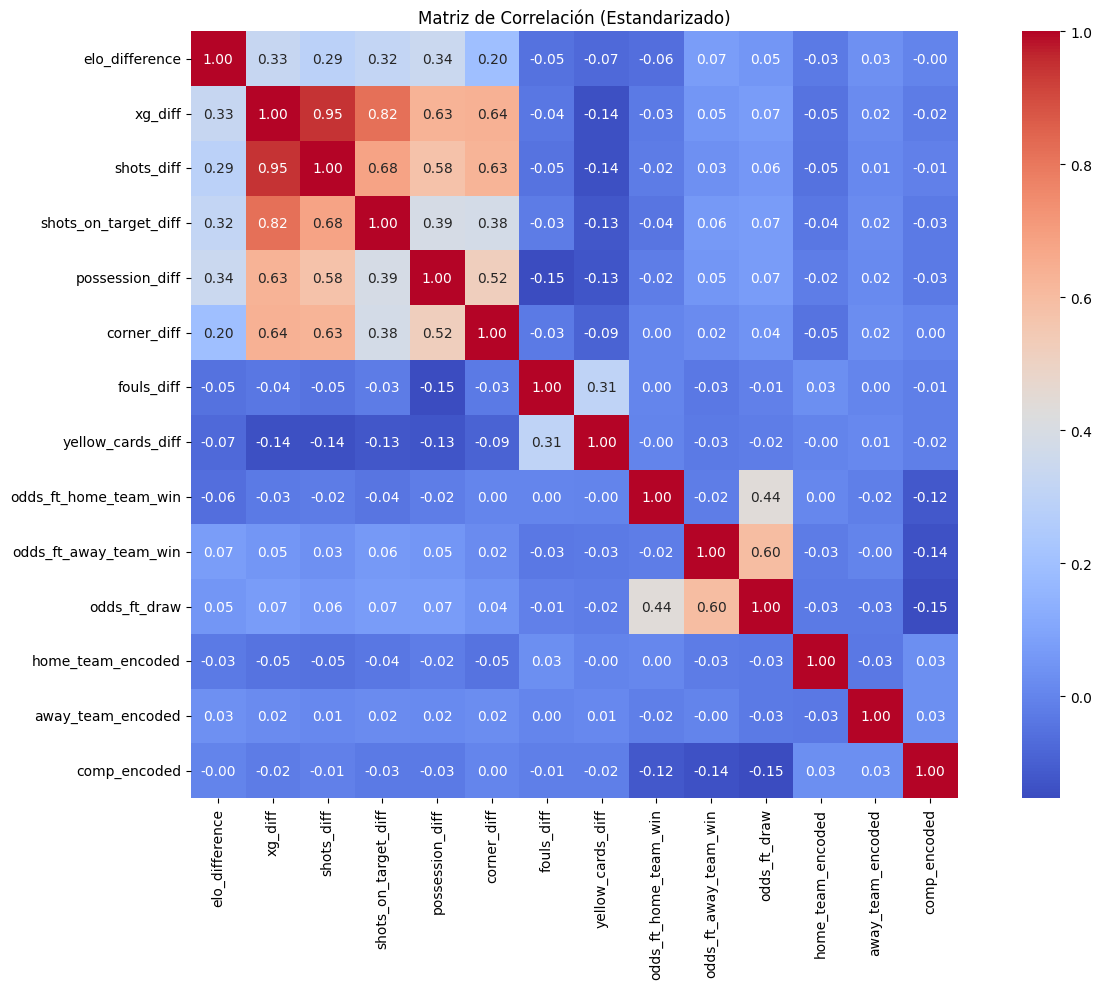

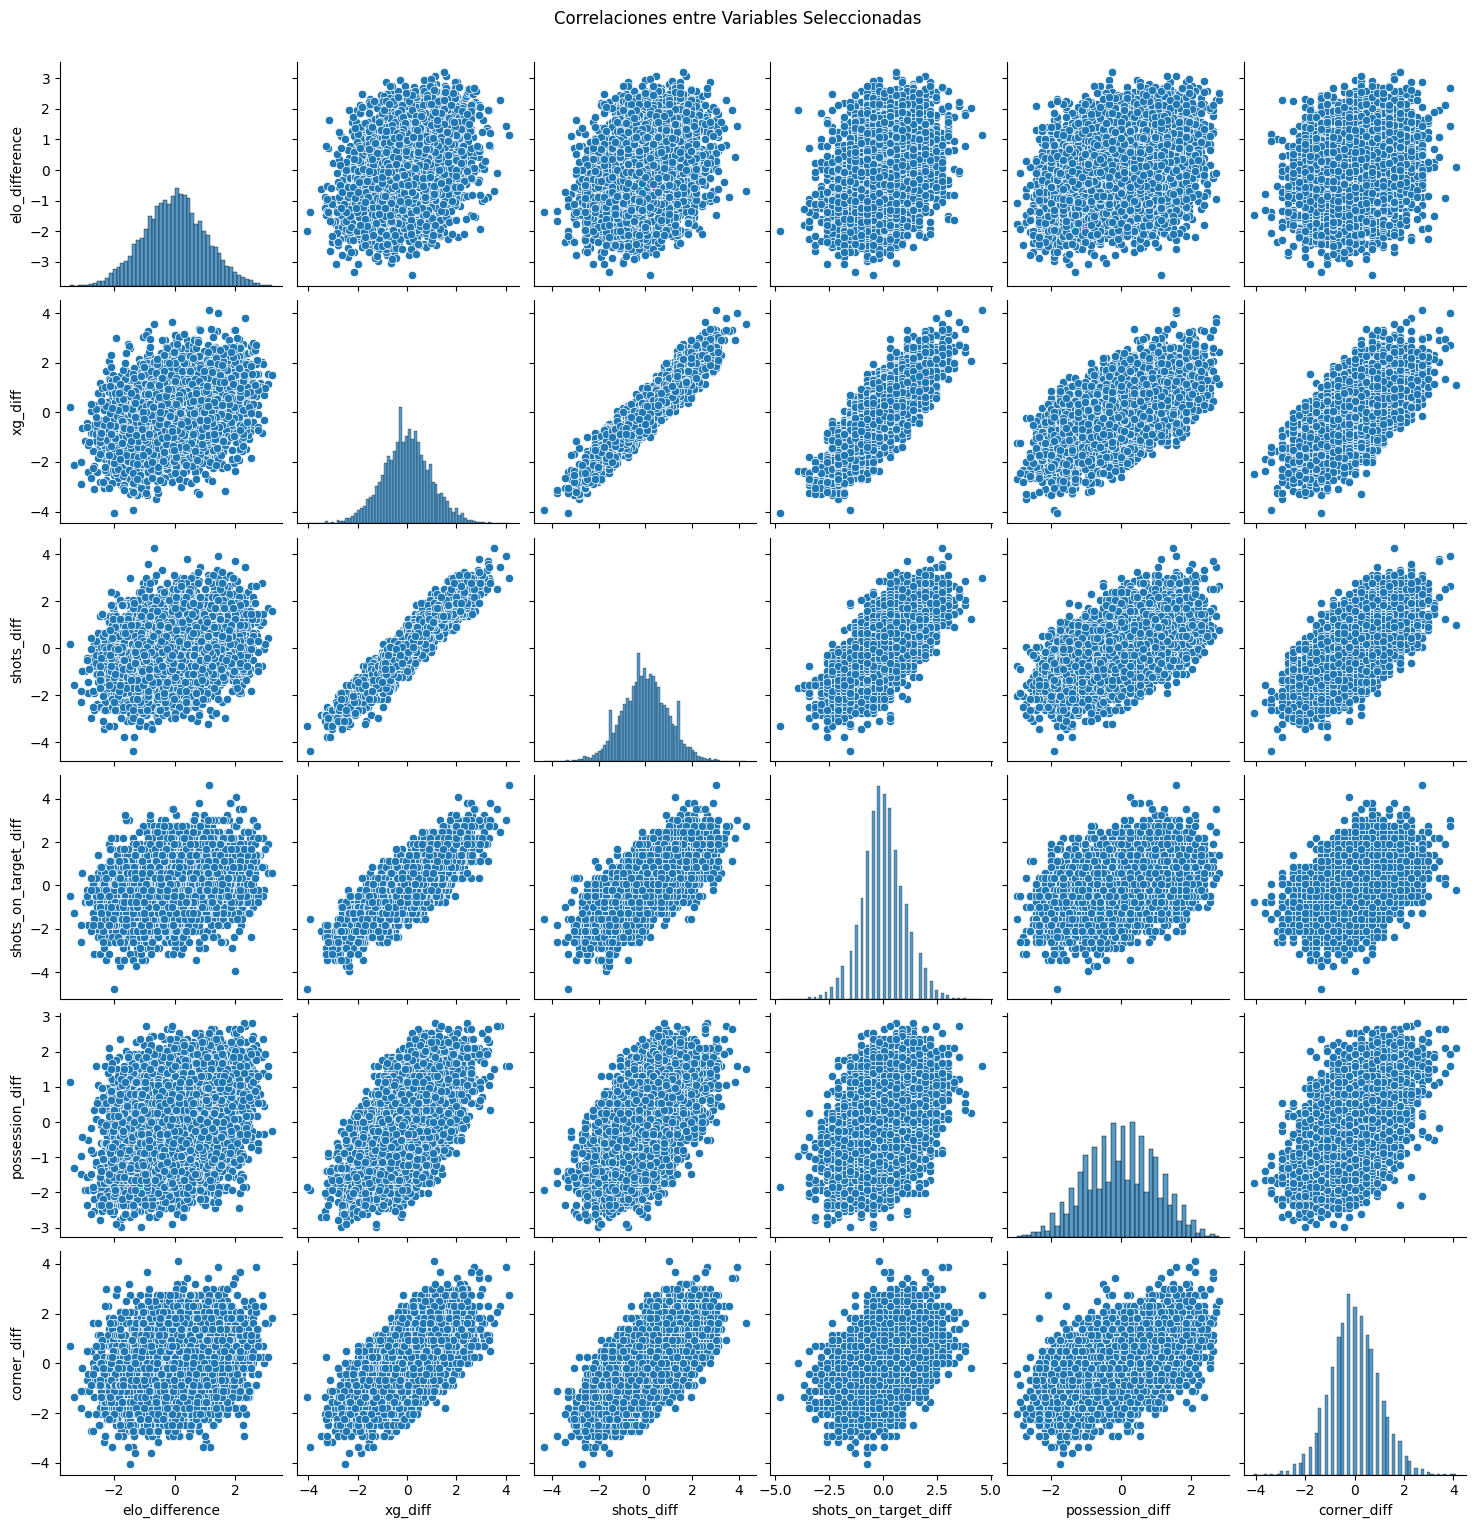

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("/content/dataset_refinado_limpio_TFG.xlsx")

features = [
    "elo_difference", "xg_diff", "shots_diff", "shots_on_target_diff",
    "possession_diff", "corner_diff", "fouls_diff", "yellow_cards_diff",
    "odds_ft_home_team_win", "odds_ft_away_team_win", "odds_ft_draw",
    "home_team_encoded", "away_team_encoded", "comp_encoded"
]

df_numeric = df[features]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=features)

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(7, 4, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')

    plt.subplot(7, 4, 2 * i + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(7, 4, 2 * i + 1)
    sns.histplot(df_scaled[col], kde=True)
    plt.title(f'Distribución Est. de {col}')

    plt.subplot(7, 4, 2 * i + 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f'Boxplot Est. de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlación (Estandarizado)")
plt.tight_layout()
plt.show()

sns.pairplot(df_scaled[features[:6]])
plt.suptitle("Correlaciones entre Variables Seleccionadas", y=1.02)
plt.show()
